In [72]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import glob
import random
import shutil

from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [62]:
#os.chdir(r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset")

if os.path.isdir(r'Covid19-dataset\valid') is False:
    os.makedirs(r'valid\Covid')
    os.makedirs(r'valid\Normal')
    os.makedirs(r'valid\Pneumonia')
    
    for c in random.sample(glob.glob(r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\train\Covid\*.png"), 10):
        shutil.move(c, r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\valid\Covid")
    for c in random.sample(glob.glob(r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\train\Normal\*.png"), 10):
        shutil.move(c, r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\valid\Normal")
    for c in random.sample(glob.glob(r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\train\Pneumonia\*.png"), 10):
        shutil.move(c, r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\valid\Pneumonia")        

In [63]:
train_path = r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\train"
valid_path = r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\valid"
test_path = r"C:\Users\10inm\deep_learning\codecademy_deep_learning\covid_project\Covid19-dataset\test"

In [90]:
train_generator = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  rotation_range=15,
                                  width_shift_range=0.05,
                                  height_shift_range=0.05)

valid_generator = ImageDataGenerator(rescale=1.0/255)

test_generator = ImageDataGenerator(rescale=1.0/255)

In [91]:
train_batches = train_generator.flow_from_directory(directory=train_path,
                                                        target_size=(256,256),
                                                        color_mode='grayscale',
                                                        batch_size=10,
                                                        class_mode='input')

valid_batches = valid_generator.flow_from_directory(directory=valid_path,
                                                   target_size=(256,256),
                                                   color_mode='grayscale',
                                                   batch_size=10,
                                                   class_mode='input')

test_batches = train_generator.flow_from_directory(directory=test_path,
                                                        target_size=(256,256),
                                                        color_mode='grayscale',
                                                        batch_size=10,
                                                        shuffle=False,
                                                        class_mode='input')

Found 201 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [93]:
train_images, train_labels = next(train_batches)
train_images.shape, train_labels.shape

((10, 256, 256, 1), (10, 256, 256, 1))

In [94]:
valid_images, valid_labels = next(valid_batches)
valid_images.shape, valid_labels.shape

((10, 256, 256, 1), (10, 256, 256, 1))

In [95]:
test_images, test_labels = next(test_batches)
test_images.shape, test_labels.shape

((10, 256, 256, 1), (10, 256, 256, 1))

In [79]:
def plotImages(images_arr):
    """
    This function will plot images in the form of a grid
    with 1 row and 10 columns where images are placed"""
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

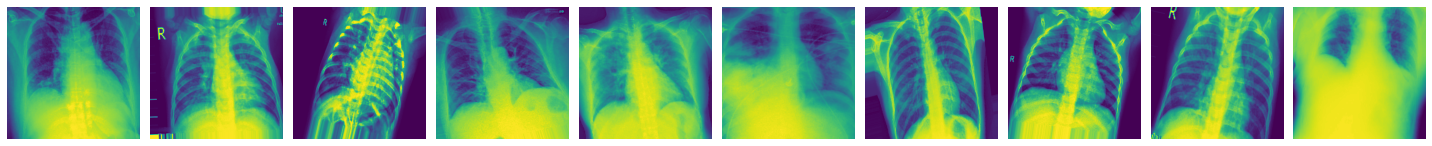

[[[[0.16779292]
   [0.17391306]
   [0.18145624]
   ...
   [0.38426813]
   [0.24744603]
   [0.22840387]]

  [[0.20887348]
   [0.18358457]
   [0.17772515]
   ...
   [0.4416855 ]
   [0.39501777]
   [0.2958933 ]]

  [[0.25155514]
   [0.23896731]
   [0.2621385 ]
   ...
   [0.41718456]
   [0.42051393]
   [0.37039185]]

  ...

  [[0.05228287]
   [0.05276155]
   [0.05324024]
   ...
   [0.68836415]
   [0.620953  ]
   [0.61742646]]

  [[0.05430565]
   [0.05382697]
   [0.05334829]
   ...
   [0.7001063 ]
   [0.62716734]
   [0.61503977]]

  [[0.05109026]
   [0.05061157]
   [0.05013289]
   ...
   [0.71796143]
   [0.6160505 ]
   [0.61027527]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.12221608]
   [0.1254902 ]
   [0.22817227]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.12202466]
   [0.1254902 ]
   [0.1854846 ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.12183324]
   [0.1254902 ]
   [0.14279695]]

  ...

  [[1.        ]
   [1.        ]
   [1. 

In [80]:
plotImages(images)
print(labels)

In [82]:
model = Sequential([
    # input layer
    Input(shape=(256,256,1)),
    # convolutional layer
    Conv2D(2, 5, strides=3, padding='valid', activation='relu'),
    # pooling layer
    MaxPooling2D(pool_size=(5,5), strides=(5,5)),
    # flatten layer
    Flatten(),
    # output layer
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 84, 84, 2)         52        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 1,591
Trainable params: 1,591
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [98]:
model.fit(x=train_batches,
          steps_per_epoch=train_batches.samples/10,
          validation_data=valid_batches,
          validation_steps=valid_batches.samples/10,
          epochs=10,
          verbose=1)

Epoch 1/10


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [10,3] and labels shape [655360]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits
 (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:5113)
]] [Op:__inference_train_function_2654]

Errors may have originated from an input operation.
Input Source operations connected to node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:
In[0] sparse_categorical_crossentropy/Reshape_1 (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:5109)	
In[1] sparse_categorical_crossentropy/Reshape (defined at C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py:3561)

Operation defined at: (most recent call last)
>>>   File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\10inm\AppData\Local\Temp/ipykernel_12032/1604444507.py", line 1, in <module>
>>>     model.fit(x=train_batches,
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1737, in sparse_categorical_crossentropy
>>>     return backend.sparse_categorical_crossentropy(
>>> 
>>>   File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5113, in sparse_categorical_crossentropy
>>>     res = tf.nn.sparse_softmax_cross_entropy_with_logits(
>>> 